# 06. Advanced Applications and Multi-Agent Systems

# 安装依赖

In [1]:
%uv pip install langchain~=1.0 langchain-core~=1.0 langchain-community==1.0.0a1 langchain-openai~=1.0 langgraph~=1.0

Resolved 60 packages in 328ms                                        
░░░░░░░░░░░░░░░░░░░░ [0/59] Installing wheels...                                warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 59 packages in 120ms                              
 + aiohappyeyeballs==2.6.1
 + aiohttp==3.13.2
 + aiosignal==1.4.0
 + annotated-types==0.7.0
 + anyio==4.11.0
 + attrs==25.4.0
 + certifi==2025.10.5
 + charset-normalizer==3.4.4
 + dataclasses-json==0.6.7
 + distro==1.9.0
 + frozenlist==1.8.0
 + greenlet==3.2.4
 + h11==0.16.0
 + httpcore==1.0.9
 + httpx==0.28.1
 + httpx-sse==0.4.3
 + idna==3.11
 + jiter==0.11.1
 + jsonpatch==1.33
 + jsonpointer==3.0.0
 + langchain==1.0.3
 + langchain-classic==1.0.0
 + langchai

In [2]:
%uv pip install python-dotenv~=1.1

Audited 1 package in 1ms
Note: you may need to restart the kernel to use updated packages.


In [3]:
%uv pip install arxiv~=2.2 ddgs~=9.6 wikipedia~=1.4

Resolved 26 packages in 102ms                                        
░░░░░░░░░░░░░░░░░░░░ [0/15] Installing wheels...                                warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 15 packages in 27ms                               
 + arxiv==2.3.0
 + beautifulsoup4==4.14.2
 + brotli==1.1.0
 + click==8.3.0
 + ddgs==9.6.1
 + feedparser==6.0.12
 + h2==4.3.0
 + hpack==4.1.0
 + hyperframe==6.1.0
 + lxml==6.0.2
 + primp==0.15.0
 + sgmllib3k==1.0.0
 + socksio==1.0.0
 + soupsieve==2.8
 + wikipedia==1.4.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import os

import dotenv
from langchain_openai import ChatOpenAI


class Config:
    def __init__(self):
        # By default, load_dotenv doesn't override existing environment variables and looks for a .env file in same directory as python script or searches for it incrementally higher up.
        dotenv_path = dotenv.find_dotenv(usecwd=True)
        if not dotenv_path:
            raise ValueError("No .env file found")
        dotenv.load_dotenv(dotenv_path=dotenv_path)

        api_key = os.getenv("OPENAI_API_KEY")
        if not api_key:
            raise ValueError("OPENAI_API_KEY is not set")

        base_url = os.getenv("OPENAI_API_BASE_URL")
        if not base_url:
            raise ValueError("OPENAI_API_BASE_URL is not set")

        model = os.getenv("OPENAI_MODEL")
        if not model:
            raise ValueError("OPENAI_MODEL is not set")

        self.api_key = api_key
        self.base_url = base_url
        self.model = model

    def new_openai_like(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        return ChatOpenAI(
            api_key=self.api_key, base_url=self.base_url, model=self.model, **kwargs
        )

    def new_openai_like_small(self, **kwargs) -> ChatOpenAI:
        # 参考：https://bailian.console.aliyun.com/?tab=api#/api/?type=model&url=2587654
        # 参考：https://help.aliyun.com/zh/model-studio/models
        # ChatOpenAI 文档参考：https://python.langchain.com/api_reference/openai/chat_models/langchain_openai.chat_models.base.ChatOpenAI.html#langchain_openai.chat_models.base.ChatOpenAI
        model = os.environ["OPENAI_MODEL_SMALL"]
        return ChatOpenAI(
            api_key=self.api_key, base_url=self.base_url, model=model, **kwargs
        )

## Agentic architectures
### Agentic RAG
RAG becomes agentic RAG when you have shared partial control with the LLM over the execution flow.

## Multi-agent architectures

### Agent roles and specialization

1. Specialization improves performance on specific tasks. This allows you to:
    - Select the optimal set of tools for each task type.
    - Craft tailored prompts and workflows.
    - Fine-tune hyper-parameters such as temperature for specific contexts.
2. Specialized agents help manage complexity

### Consensus mechanism

Let multiple agents work on the same tasks in parallel.

One important note on parallelization – when you let LangGraph execute nodes in parallel, updates
are applied to the main state in the same order as you’ve added nodes to your graph.

### Communication protocols
Let agents communicate and work collaboratively on a task.

Agents can work collaboratively on a task by providing critique and reflection.

Reflection patterns 
1. **self-reflection**, when the agent analyzes its own steps and identifies areas for improvements
1. **cross-reflection**, when you use another agent
1. **even reflection**, which includes Human-in-the-Loop (HIL) on critical checkpoints 

2 practical mechanisms to structure and facilitate agent interactions:
1. semantic routing, which directs tasks intelligently based on their content.
1. organizing interaction, detailing the specific formats and structures that agents can use to effectively exchange information.

#### Semantic router

2 ways for multi-class tasks, 
1. Educate the user by replying with an explanation that they should task your application with a single problem per turn.
1. Use tool calling or other controlled generation techniques we’ve learned about to extract both goals and route the 
execution to two specialized agents with different tasks

#### Organizing interactions

2 ways to organize communication
1. Communicate via specific structures that force them to put their thoughts and reasoning traces in a specific form.
1. Apply messages from different agents to the shared list of messages
    - Share all messages via a so-called scratchpad – a shared list of messages. As list grows, trimming the chat history is necessary.
    - Share only the final results of each execution

In [5]:
%uv pip install datasets~=4.2

Resolved 40 packages in 107ms                                        
░░░░░░░░░░░░░░░░░░░░ [0/13] Installing wheels...                                warning: Failed to hardlink files; falling back to full copy. This may lead to degraded performance.
         If the cache and target directories are on different filesystems, hardlinking may not be supported.
         If this is intentional, set `export UV_LINK_MODE=copy` or use `--link-mode=copy` to suppress this warning.
Installed 13 packages in 160ms                              
 + datasets==4.3.0
 + dill==0.4.0
 + filelock==3.20.0
 + fsspec==2025.9.0
 + hf-xet==1.2.0
 + huggingface-hub==1.0.1
 + multiprocess==0.70.16
 + pandas==2.3.3
 + pyarrow==22.0.0
 + pytz==2025.2
 + shellingham==1.5.4
 + typer-slim==0.20.0
 + tzdata==2025.2
Note: you may need to restart the kernel to use updated packages.


In [6]:
from datasets import load_dataset


ds = load_dataset("cais/mmlu", "high_school_geography")

ds_dict = ds["test"].take(100).to_dict()

ds_dict["question"][0]

/github.com/sammyne/generative-ai-with-lang-chain-2ed/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'The main factor preventing subsistence economies from advancing economically is the lack of'

In [7]:
ds_dict["choices"][0]

['a currency.',
 'a well-connected transportation infrastructure.',
 'government activity.',
 'a banking service.']

In [8]:
llm_small = Config().new_openai_like_small()

In [10]:
from langchain_classic.agents import load_tools


llm = Config().new_openai_like()

research_tools = load_tools(tool_names=["ddg-search", "arxiv", "wikipedia"], llm=llm)

system_prompt = (
    "You're a hard-working, curious and creative student. "
    "You're working on exam question. Think step by step."
    "Always provide an argumentation for your answer. "
    "Do not assume anything, use available tools to search "
    "for evidence and supporting statements."
)

In [ ]:
from langchain_core.prompts import ChatPromptTemplate
from langchain.agents import AgentState, create_agent


raw_prompt_template = (
    "Answer the following multiple-choice question. "
    "\nQUESTION:\n{question}\n\nANSWER OPTIONS:\n{options}\n"
)
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("user", raw_prompt_template),
        ("placeholder", "{messages}"),
    ]
)


class ResearchState(AgentState):
    question: str
    options: str


research_agent = create_agent(
    model=llm_small,
    tools=research_tools,
    state_schema=ResearchState,
    system_prompt=prompt,
)

In [14]:
from langchain_core.prompts import PromptTemplate
from pydantic import BaseModel, Field
from langchain_core.output_parsers import PydanticOutputParser


# 'Output in JSON format' 的必要性参见
# - Qwen 的 https://help.aliyun.com/zh/model-studio/json-mode?spm=0.0.0.i2#6f7bb9cd64o7o
# - https://platform.openai.com/docs/guides/structured-outputs/function-calling-vs-response-format#supported-schemas
reflection_prompt = (
    "You are a university professor and you're supervising a student who is "
    "working on multiple-choice exam question. "
    "nQUESTION: {question}.\nANSWER OPTIONS:\n{options}\n."
    "STUDENT'S ANSWER:\n{answer}\n"
    "Reflect on the answer and provide a feedback whether the answer "
    "is right or wrong. If you think the final answer is correct, reply with "
    "the final answer. Only provide critique if you think the answer might "
    "be incorrect or there are reasoning flaws. Do not assume anything, "
    "evaluate only the reasoning the student provided and whether there is "
    "enough evidence for their answer.\n"
    # "Output in JSON format, where the correct answer is put in the 'answer' field, "
    # "and critique is put in the 'critique' field."
    "{format_instructions}"
)


class Response(BaseModel):
    """A final response to the user."""

    answer: str | None = Field(
        description="The final answer. It should be empty if critique has been provided.",
        default=None,
    )
    critique: str | None = Field(
        description="A critique of the initial answer. If you think it might be incorrect, provide an actionable feedback",
        default=None,
    )


parser = PydanticOutputParser(pydantic_object=Response)
reflection_prompt_tmpl = PromptTemplate.from_template(reflection_prompt).partial(
    format_instructions=parser.get_format_instructions()
)

reflection_chain = reflection_prompt_tmpl | llm.with_structured_output(Response)

In [16]:
raw_prompt_template_with_critique = (
    "You tried to answer the exam question and you get feedback from your "
    "professor. Work on improving your answer and incorporating the feedback. "
    "\nQUESTION:\n{question}\n\nANSWER OPTIONS:\n{options}\n\n"
    "INITIAL ANSWER:\n{answer}\n\nFEEDBACK:\n{feedback}"
)
prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("user", raw_prompt_template_with_critique),
        ("placeholder", "{messages}"),
    ]
)


class ReflectionState(ResearchState):
    answer: str
    feedback: str


research_agent_with_critique = create_agent(
    model=llm_small,
    tools=research_tools,
    state_schema=ReflectionState,
    system_prompt=prompt,
)

In [17]:
from typing import Annotated, Literal, TypedDict
from langchain_core.runnables.config import RunnableConfig
from operator import add
from langgraph.graph import StateGraph, START, END


class ReflectionAgentState(TypedDict):
    question: str
    options: str
    answer: str
    steps: Annotated[int, add]
    response: Response


def _should_end(
    state: ReflectionAgentState, config: RunnableConfig
) -> Literal["research", END]:
    max_reasoning_steps = config["configurable"].get("max_reasoning_steps", 10)
    if state.get("response") and state["response"].answer:
        return END
    if state.get("steps", 1) > max_reasoning_steps:
        return END
    return "research"


def _reflection_step(state):
    result = reflection_chain.invoke(state)
    return {"response": result, "steps": 1}


def _research_start(state):
    answer = research_agent.invoke(state)
    return {"answer": answer["messages"][-1].content}


def _research(state):
    agent_state = {
        "answer": state["answer"],
        "question": state["question"],
        "options": state["options"],
        "feedback": state["response"].critique,
    }
    answer = research_agent_with_critique.invoke(agent_state)
    return {"answer": answer["messages"][-1].content}

In [ ]:
builder = StateGraph(ReflectionAgentState)

builder.add_node("research_start", _research_start)
builder.add_node("research", _research)
builder.add_node("reflect", _reflection_step)

builder.add_edge(START, "research_start")
builder.add_edge("research_start", "reflect")
builder.add_edge("research", "reflect")
builder.add_conditional_edges("reflect", _should_end)

graph = builder.compile()

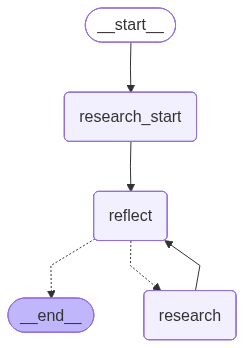

In [19]:
from IPython.display import Image, display


display(Image(graph.get_graph().draw_mermaid_png()))

In [20]:
i = 0
question = ds_dict["question"][i]
options = "\n".join([f"{i}. {a}" for i, a in enumerate(ds_dict["choices"][i])])

In [23]:
async for _, event in graph.astream(
    {"question": question, "options": options}, stream_mode=["updates"]
):
    print(event)

ValidationError: 21 validation errors for SystemMessage
content.str
  Input should be a valid string [type=string_type, input_value=ChatPromptTemplate(input_...sages', optional=True)]), input_type=ChatPromptTemplate]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].4.str
  Input should be a valid string [type=string_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].4.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].5.str
  Input should be a valid string [type=string_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].5.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].6.str
  Input should be a valid string [type=string_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].6.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].7.str
  Input should be a valid string [type=string_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].7.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].8.str
  Input should be a valid string [type=string_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].8.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].9.str
  Input should be a valid string [type=string_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].9.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type

### LangGraph streaming

The `stream` method allows you to stream changes to the graph’s state after each super-step.

A super-step is a single iteration over the graph where
- Parallel nodes belong to a single super-step
- Sequential nodes belong to different super-steps

5 stream mode as
Mode | Description | Output
-----|-------------|----------
updates | Streams only updates to the graph produced by the node | A dictionary where each node name maps to its corresponding state update)
values | Streams the full state of the graph after each super-step | A dictionary with the entire graph’s state 
debug | Attempts to stream as much information as possible in the debug mode | A dictionary with a timestamp, task_type, and all the corresponding information for every event
custom | Streams events emitted by the node using a StreamWriter | A dictionary that was written from the node to a custom writer
messages | Streams full events (for example, ToolMessages) or its chunks in a streaming node if possible (e.g., AI Messages) | A tuple with token or message segment and a dictionary containing metadata from the node

In [24]:
async for _, event in research_agent.astream(
    {"question": question, "options": options}, stream_mode=["values"]
):
    print(len(event["messages"]))

0


ValidationError: 21 validation errors for SystemMessage
content.str
  Input should be a valid string [type=string_type, input_value=ChatPromptTemplate(input_...sages', optional=True)]), input_type=ChatPromptTemplate]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].4.str
  Input should be a valid string [type=string_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].4.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].5.str
  Input should be a valid string [type=string_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].5.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].6.str
  Input should be a valid string [type=string_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].6.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].7.str
  Input should be a valid string [type=string_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].7.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].8.str
  Input should be a valid string [type=string_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].8.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].9.str
  Input should be a valid string [type=string_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].9.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type

In [25]:
async for _, event in research_agent.astream(
    {"question": question, "options": options}, stream_mode=["updates"]
):
    node = list(event.keys())[0]
    print(node, len(event[node].get("messages", [])))

ValidationError: 21 validation errors for SystemMessage
content.str
  Input should be a valid string [type=string_type, input_value=ChatPromptTemplate(input_...sages', optional=True)]), input_type=ChatPromptTemplate]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].4.str
  Input should be a valid string [type=string_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].4.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].5.str
  Input should be a valid string [type=string_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].5.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].6.str
  Input should be a valid string [type=string_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].6.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].7.str
  Input should be a valid string [type=string_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].7.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].8.str
  Input should be a valid string [type=string_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].8.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].9.str
  Input should be a valid string [type=string_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].9.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type

In [26]:
seen_events = set([])
async for event in research_agent.astream_events(
    {"question": question, "options": options}, version="v1"
):
    if event["event"] not in seen_events:
        seen_events.add(event["event"])

print(seen_events)

ValidationError: 21 validation errors for SystemMessage
content.str
  Input should be a valid string [type=string_type, input_value=ChatPromptTemplate(input_...sages', optional=True)]), input_type=ChatPromptTemplate]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.str
  Input should be a valid string [type=string_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].0.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('name', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].1.str
  Input should be a valid string [type=string_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].1.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_variables', ['options', 'question']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].2.str
  Input should be a valid string [type=string_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].2.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('optional_variables', ['messages']), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].3.str
  Input should be a valid string [type=string_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].3.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('input_types', {'message...error_context=None))]]}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].4.str
  Input should be a valid string [type=string_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].4.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('output_parser', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].5.str
  Input should be a valid string [type=string_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].5.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('partial_variables', {'messages': []}), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].6.str
  Input should be a valid string [type=string_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].6.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('metadata', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].7.str
  Input should be a valid string [type=string_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].7.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('tags', None), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].8.str
  Input should be a valid string [type=string_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].8.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('messages', [SystemMessa...sages', optional=True)]), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type
content.list[union[str,dict[any,any]]].9.str
  Input should be a valid string [type=string_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/string_type
content.list[union[str,dict[any,any]]].9.dict[any,any]
  Input should be a valid dictionary [type=dict_type, input_value=('validate_template', False), input_type=tuple]
    For further information visit https://errors.pydantic.dev/2.12/v/dict_type

### Handoffs

Handoffs: update your graph’s state and at the same time invoke another agent by passing a custom state to it using the
`Command` API with 2 fields
- Pass an `update` – a dictionary with an update of the current state to be sent to your graph
- `goto` – a name (or list of names) of the nodes to hand off control. A destination agent can be a node from the current or a parent (`Command.PARENT`) graph 

#### Communication via a shared messages list

In [27]:
llm = Config().new_openai_like()

In [30]:
from langchain_classic.agents import load_tools
from langchain.agents import create_agent


research_tools = load_tools(tool_names=["ddg-search", "arxiv", "wikipedia"], llm=llm)

system_prompt = (
    "You're a hard-working, curious and creative student. "
    "You're working on exam question. Think step by step."
    "Always provide an argumentation for your answer. "
    "Do not assume anything, use available tools to search "
    "for evidence and supporting statements."
)

research_agent = create_agent(
    model=llm, tools=research_tools, system_prompt=system_prompt
)

In [31]:
reflection_prompt = (
    "You are a university professor and you're supervising a student who is "
    "working on multiple-choice exam question. "
    "Given the dialogue above, reflect on the answer provided and give a feedback "
    " if needed. If you think the final answer is correct, reply with "
    "an empty message. Only provide critique if you think the last answer might "
    "be incorrect or there are reasoning flaws. Do not assume anything, "
    "evaluate only the reasoning the student provided and whether there is "
    "enough evidence for their answer."
)

In [32]:
from langchain_core.prompts import PromptTemplate
from langgraph.types import Command
from langchain_core.runnables import RunnableConfig
from langgraph.graph import END


question_template = PromptTemplate.from_template(
    "QUESTION:\n{question}\n\nANSWER OPTIONS:\n{options}\n\n"
)


def _ask_question(state):
    return {"messages": [("human", question_template.invoke(state).text)]}


def _give_feedback(state, config: RunnableConfig):
    # print(state.keys())
    messages = state["messages"] + [("human", reflection_prompt)]
    max_messages = config["configurable"].get("max_messages", 20)

    if len(messages) > max_messages:
        return Command(update={}, goto=END)

    result = llm.invoke(messages)

    if result.content:
        return Command(
            update={
                "messages": [
                    ("assistant", result.content),
                    ("human", "Please, address the feedback above and give an answer."),
                ]
            },
            goto="research",
        )
    return Command(update={}, goto=END)

In [33]:
from langgraph.graph import StateGraph, START, MessagesState


class ReflectionAgentState(MessagesState):
    question: str
    options: str


builder = StateGraph(ReflectionAgentState)

builder.add_node("ask_question", _ask_question)
builder.add_node("research", research_agent)
builder.add_node("reflect", _give_feedback)

builder.add_edge(START, "ask_question")
builder.add_edge("ask_question", "research")
builder.add_edge("research", "reflect")

graph = builder.compile()

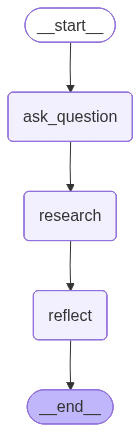

In [34]:
from IPython.display import Image, display


display(Image(graph.get_graph().draw_mermaid_png()))

In [35]:
async for _, event in graph.astream(
    {"question": question, "options": options}, stream_mode=["values"]
):
    print(len(event["messages"]))

0
1
8
10
11
13
14
16
17
19
20


## LangGraph platform
## Building adaptive systems
### Dynamic behavior adjustment
### Human-in-the-loop

In [36]:
from langgraph.types import interrupt
from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import MessagesState, StateGraph, START


class State(MessagesState):
    home_address: str | None


def _human_input(state: State):
    address = interrupt("What is your address?")
    return {"home_address": address}


builder = StateGraph(State)
builder.add_node("human_input", _human_input)
builder.add_edge(START, "human_input")

checkpointer = MemorySaver()

graph = builder.compile(checkpointer=checkpointer)
config = {"configurable": {"thread_id": "1"}}
for chunk in graph.stream({"messages": [("human", "What is weather today?")]}, config):
    print(chunk)

{'__interrupt__': (Interrupt(value='What is your address?', id='7116c6a05f5c258f3cd630aa05c146fd'),)}


In [37]:
from langgraph.types import Command


for chunk in graph.stream(Command(resume="Munich"), config):
    print(chunk)

{'human_input': {'home_address': 'Munich'}}


## Exploring reasoning paths
### Tree of Thoughts

In [39]:
from pydantic import BaseModel, Field
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import PydanticOutputParser


class Plan(BaseModel):
    """Plan to follow in future"""

    steps: list[str] = Field(
        description="different steps to follow, should be in sorted order"
    )


parser = PydanticOutputParser(pydantic_object=Plan)

system_prompt_template = (
    "For the given task, come up with a step by step plan.\n"
    "This plan should involve individual tasks, that if executed correctly will "
    "yield the correct answer. Do not add any superfluous steps.\n"
    "The result of the final step should be the final answer. Make sure that each "
    "step has all the information needed - do not skip steps.\n"
    "Output in JSON format described as follows.\n"
    "{formatting_instructions}"
)
# 注意 system 消息中的插值变量 `formatting_instructions` 需要和 partial 函数的入参完全匹配。
planner_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt_template),
        ("user", "Prepare a plan how to solve the following task:\n{task}\n"),
    ]
).partial(formatting_instructions=parser.get_format_instructions())


llm = Config().new_openai_like()

planner = planner_prompt | llm.with_structured_output(Plan)

In [40]:
from langchain_classic.agents import load_tools
from langchain.agents import create_agent

llm = Config().new_openai_like()

tools = load_tools(tool_names=["ddg-search", "arxiv", "wikipedia"], llm=llm)

system_prompt = (
    "You're a smart assistant that carefully helps to solve complex tasks.\n"
    " Given a general plan to solve a task and a specific step, work on this step. "
    " Don't assume anything, keep in minds things might change and always try to "
    "use tools to double-check yourself.\nUse Search to gather "
    "information about common facts, fresh events and news, use Arxiv to get "
    "ideas on recent research and use Wikipedia for common knowledge."
)

step_template = (
    "Given the task and the plan, try to execute on a specific step of the plan.\n"
    "TASK:\n{task}\n\nPLAN:\n{previous_steps}\n\nSTEP TO EXECUTE:\n{step}\n"
)

prompt_template = ChatPromptTemplate.from_messages(
    [
        ("system", system_prompt),
        ("user", step_template),
    ]
)

execution_agent = prompt_template | create_agent(model=llm, tools=tools)

In [42]:
from langchain_core.prompts import ChatPromptTemplate


class ReplanStep(BaseModel):
    """Replanned next step in the plan."""

    steps: list[str] = Field(description="different options of the proposed next step")


llm_replanner = llm.with_structured_output(ReplanStep)

parser = PydanticOutputParser(pydantic_object=Plan)

replanner_prompt_template = (
    "Suggest next action in the plan. Do not add any superfluous steps.\n"
    "If you think no actions are needed, just return an empty list of steps. "
    "TASK: {task}\n PREVIOUS STEPS WITH OUTPUTS: {current_plan}\n"
    "Output in JSON format described as follows.\n"
    "{formatting_instructions}"
)
# 参考 https://zhuanlan.zhihu.com/p/1901678624639255242
replanner_prompt = ChatPromptTemplate.from_messages(
    [
        (
            "system",
            "You're a helpful assistant. You goal is to help with planning actions to solve the task. Do not solve the task itself.",
        ),
        ("user", replanner_prompt_template),
    ]
).partial(formatting_instructions=parser.get_format_instructions())

replanner = replanner_prompt | llm_replanner

In [43]:
from typing import Optional


class TreeNode:

    def __init__(
        self,
        node_id: int,
        step: str,
        step_output: str | None = None,
        parent: Optional["TreeNode"] = None,
    ):
        self.node_id = node_id
        self.step = step
        self.step_output = step_output
        self.parent = parent
        self.children = []
        self.final_response = None

    def __repr__(self):
        parent_id = self.parent.node_id if self.parent else "None"
        return f"Node_id: {self.node_id}, parent: {parent_id}, {len(self.children)} children."

    def get_full_plan(self) -> str:
        """Returns formatted plan with step numbers and past results."""
        steps = []
        node = self
        while node.parent:
            steps.append((node.step, node.step_output))
            node = node.parent

        full_plan = []
        for i, (step, result) in enumerate(steps[::-1]):
            if result:
                full_plan.append(f"# {i+1}. Planned step: {step}\nResult: {result}\n")
        return "\n".join(full_plan)

In [44]:
import operator
from collections import deque
from typing import Annotated, TypedDict


class PlanState(TypedDict):
    task: str
    root: TreeNode
    queue: deque[TreeNode]
    current_node: TreeNode
    next_node: TreeNode
    is_current_node_final: bool
    paths_explored: Annotated[int, operator.add]
    visited_ids: set[int]
    max_id: int
    candidates: Annotated[list[str], operator.add]
    best_candidate: str

In [45]:
from langchain_core.runnables import RunnableConfig
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import PromptTemplate
from langgraph.types import Command

final_prompt = PromptTemplate.from_template(
    "You're a helpful assistant that has executed on a plan."
    "Given the results of the execution, prepare the final response.\n"
    "Don't assume anything\nTASK:\n{task}\n\nPLAN WITH RESUlTS:\n{plan}\n"
    "FINAL RESPONSE:\n"
)

responder = final_prompt | llm | StrOutputParser()


# 这里用的应该是广度有限算法，而不是书中说的深度优先算法。
async def _run_node(state: PlanState, config: RunnableConfig):
    node = state.get("next_node")
    visited_ids = state.get("visited_ids", set())
    queue = state["queue"]
    if node is None:
        while queue and not node:
            node = state["queue"].popleft()
            if node.node_id in visited_ids:
                node = None
        if not node:
            return Command(goto="vote", update={})

    step = await execution_agent.ainvoke(
        {
            "previous_steps": node.get_full_plan(),
            "step": node.step,
            "task": state["task"],
        }
    )
    node.step_output = step["messages"][-1].content
    visited_ids.add(node.node_id)
    return {
        "current_node": node,
        "queue": queue,
        "visited_ids": visited_ids,
        "next_node": None,
    }


async def _plan_next(state: PlanState, config: RunnableConfig) -> PlanState:
    max_candidates = config["configurable"].get("max_candidates", 1)
    node = state["current_node"]
    next_step = await replanner.ainvoke(
        {"task": state["task"], "current_plan": node.get_full_plan()}
    )
    if not next_step.steps:
        return {"is_current_node_final": True}
    max_id = state["max_id"]
    for step in next_step.steps[:max_candidates]:
        child = TreeNode(node_id=max_id + 1, step=step, parent=node)
        max_id += 1
        node.children.append(child)
        state["queue"].append(child)
    return {"is_current_node_final": False, "next_node": child, "max_id": max_id}

In [46]:
from langchain_core.prompts import PromptTemplate


prompt_voting = PromptTemplate.from_template(
    "Pick the best solution for a given task. "
    "\nTASK:{task}\n\nSOLUTIONS:\n{candidates}\n"
    "Output 1-based index of the best solution.\n"
)


def _vote_for_the_best_option(state):
    candidates = state.get("candidates", [])
    if not candidates:
        return {"best_response": None}
    all_candidates = []
    for i, candidate in enumerate(candidates):
        all_candidates.append(f"OPTION {i+1}: {candidate}")

    llm_enum = Config().new_openai_like()

    result = (prompt_voting | llm_enum | StrOutputParser()).invoke(
        {"candidates": "\n".join(all_candidates), "task": state["task"]}
    )
    return {"best_candidate": candidates[int(result) - 1]}

In [47]:
_vote_for_the_best_option({"candidates": ["1", "5", "4"], "task": "How much is 2+2?"})

{'best_candidate': '4'}

In [48]:
from typing import Literal
from langchain_core.output_parsers import StrOutputParser

final_prompt = PromptTemplate.from_template(
    "You're a helpful assistant that has executed on a plan."
    "Given the results of the execution, prepare the final response.\n"
    "Don't assume anything\nTASK:\n{task}\n\nPLAN WITH RESUlTS:\n{plan}\n"
    "FINAL RESPONSE:\n"
)

responder = final_prompt | llm | StrOutputParser()


async def _build_initial_plan(state: PlanState) -> PlanState:
    plan = await planner.ainvoke(state["task"])
    queue = deque()
    root = TreeNode(step=plan.steps[0], node_id=1)
    queue.append(root)
    current_root = root
    for i, step in enumerate(plan.steps[1:]):
        child = TreeNode(node_id=i + 2, step=step, parent=current_root)
        current_root.children.append(child)
        queue.append(child)
        current_root = child
    return {"root": root, "queue": queue, "max_id": i + 2}


async def _get_final_response(state: PlanState) -> PlanState:
    node = state["current_node"]
    final_response = await responder.ainvoke(
        {"task": state["task"], "plan": node.get_full_plan()}
    )
    node.final_response = final_response
    return {"paths_explored": 1, "candidates": [final_response]}


def _should_create_final_response(
    state: PlanState,
) -> Literal["run", "generate_response"]:
    return "generate_response" if state["is_current_node_final"] else "run"


def _should_continue(
    state: PlanState, config: RunnableConfig
) -> Literal["run", "vote"]:
    max_paths = config["configurable"].get("max_paths", 30)
    if state.get("paths_explored", 1) >= max_paths:
        return "vote"
    if state["queue"] or state.get("next_node"):
        return "run"
    return "vote"

In [49]:
from langgraph.graph import END

builder = StateGraph(PlanState)

builder.add_node("initial_plan", _build_initial_plan)
builder.add_node("run", _run_node)
builder.add_node("plan_next", _plan_next)
builder.add_node("generate_response", _get_final_response)
builder.add_node("vote", _vote_for_the_best_option)

builder.add_edge(START, "initial_plan")
builder.add_edge("initial_plan", "run")
builder.add_edge("run", "plan_next")
builder.add_conditional_edges("plan_next", _should_create_final_response)
builder.add_conditional_edges("generate_response", _should_continue)
builder.add_edge("vote", END)

graph = builder.compile()

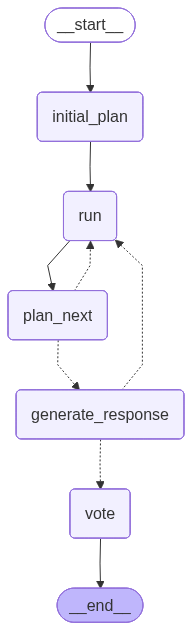

In [50]:
from IPython.display import Image, display


display(Image(graph.get_graph().draw_mermaid_png()))

In [51]:
task = "Write a strategic one-pager of building an AI startup"

# TODO: 解决执行时间过久的问题
result = await graph.ainvoke(
    {"task": task}, config={"recursion_limit": 10, "configurable": {"max_paths": 3}}
)

CancelledError: 

In [ ]:
print(len(result["candidates"]))

In [ ]:
print(result["best_candidate"])

In [22]:
# 监控执行过程的脚本
async for e in graph.astream(
    {"task": task}, config={"recursion_limit": 10, "configurable": {"max_paths": 3}}
):
    print(e)

{'initial_plan': {'root': Node_id: 1, parent: None, 1 children., 'queue': deque([Node_id: 1, parent: None, 1 children., Node_id: 2, parent: 1, 1 children., Node_id: 3, parent: 2, 1 children., Node_id: 4, parent: 3, 1 children., Node_id: 5, parent: 4, 1 children., Node_id: 6, parent: 5, 1 children., Node_id: 7, parent: 6, 1 children., Node_id: 8, parent: 7, 1 children., Node_id: 9, parent: 8, 1 children., Node_id: 10, parent: 9, 0 children.]), 'max_id': 10}}
{'run': {'current_node': Node_id: 1, parent: None, 1 children., 'queue': deque([Node_id: 2, parent: 1, 1 children., Node_id: 3, parent: 2, 1 children., Node_id: 4, parent: 3, 1 children., Node_id: 5, parent: 4, 1 children., Node_id: 6, parent: 5, 1 children., Node_id: 7, parent: 6, 1 children., Node_id: 8, parent: 7, 1 children., Node_id: 9, parent: 8, 1 children., Node_id: 10, parent: 9, 0 children.]), 'visited_ids': {1}, 'next_node': None}}
{'plan_next': {'is_current_node_final': False, 'next_node': Node_id: 11, parent: 1, 0 child

GraphRecursionError: Recursion limit of 10 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT

### Trimming ToT with MCTS

## Agent memory

Long-term memory helps an agent to accumulate knowledge and gain from historical
experiences, and enables its continuous improvement on the long horizon.

Key considerations to take into account when designing and using long-term memory in practice
1. Extract useful information that you want to store during the runtime.
1. Extract stored information during the next execution.
1. Compact memory – periodically self-reflect on what you have learned, optimize it, and forget irrelevant facts.

Implementations of long-term memory
1. A built-in cache (a mechanism to cache LLMs responses)
1. A built-in store (a persistent key-value store)

### Cache

It caches responses based on the key that consists of a string representation of the prompt and the string
representation of the LLM instance (produced by the llm._get_llm_string method).

LangChain supports in-memory and SQLite caches out of the box.

In [52]:
from langchain_core.caches import InMemoryCache
from langchain_core.globals import set_llm_cache


cache = InMemoryCache()
set_llm_cache(cache)

llm = Config().new_openai_like()

llm.invoke("What is the capital of UK?")

AIMessage(content='The capital of the United Kingdom is London.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 15, 'total_tokens': 24, 'completion_tokens_details': None, 'prompt_tokens_details': None}, 'model_provider': 'openai', 'model_name': 'qwen3-max-2025-09-23', 'system_fingerprint': None, 'id': 'chatcmpl-40a2fc8a-6b5a-45af-a209-d69896f78340', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--e0bd6ff5-6fc8-4d78-8617-a5ba9a6a2e03-0', usage_metadata={'input_tokens': 15, 'output_tokens': 9, 'total_tokens': 24, 'input_token_details': {}, 'output_token_details': {}})

In [60]:
from langchain_classic import globals


print(globals.get_llm_cache())

In [56]:
llm._get_llm_string()

'{"id": ["langchain", "chat_models", "openai", "ChatOpenAI"], "kwargs": {"model_name": "qwen3-max-2025-09-23", "openai_api_base": "https://dashscope.aliyuncs.com/compatible-mode/v1", "openai_api_key": {"id": ["OPENAI_API_KEY"], "lc": 1, "type": "secret"}}, "lc": 1, "name": "ChatOpenAI", "type": "constructor"}---[(\'stop\', None)]'

### Store

In [61]:
from langgraph.store.memory import InMemoryStore

in_memory_store = InMemoryStore()

in_memory_store.put(
    namespace=("users", "user1"), key="fact1", value={"message1": "My name is John."}
)
in_memory_store.put(
    namespace=("users", "user1", "conv1"),
    key="address",
    value={"message": "I live in Berlin."},
)

In [62]:
in_memory_store.get(namespace=("users", "user1", "conv1"), key="address")

Item(namespace=['users', 'user1', 'conv1'], key='address', value={'message': 'I live in Berlin.'}, created_at='2025-11-01T11:13:24.820598+00:00', updated_at='2025-11-01T11:13:24.820600+00:00')

In [63]:
in_memory_store.get(namespace=("users", "user1"), key="conv1")

In [64]:
in_memory_store.search(("users", "user1", "conv1"), query="name")

[Item(namespace=['users', 'user1', 'conv1'], key='address', value={'message': 'I live in Berlin.'}, created_at='2025-11-01T11:13:24.820598+00:00', updated_at='2025-11-01T11:13:24.820600+00:00', score=None)]

In [65]:
in_memory_store.search(("users", "user1"), query="name")

[Item(namespace=['users', 'user1'], key='fact1', value={'message1': 'My name is John.'}, created_at='2025-11-01T11:13:24.820380+00:00', updated_at='2025-11-01T11:13:24.820434+00:00', score=None),
 Item(namespace=['users', 'user1', 'conv1'], key='address', value={'message': 'I live in Berlin.'}, created_at='2025-11-01T11:13:24.820598+00:00', updated_at='2025-11-01T11:13:24.820600+00:00', score=None)]